In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
datos = pd.read_csv('temperature.csv', parse_dates=["datetime"])

In [9]:
datos.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


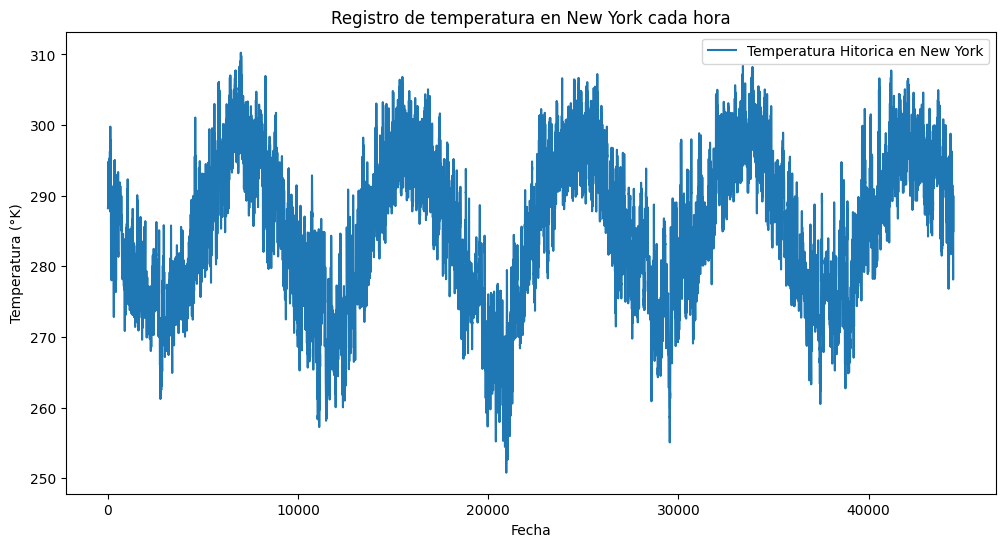

In [10]:
# Grafica de temperaturas en New York
plt.figure(figsize=(12,6))
plt.plot(datos['New York'], label='Temperatura Hitorica en New York')
plt.title("Registro de temperatura en New York cada hora")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°K)")
plt.legend()
plt.show()

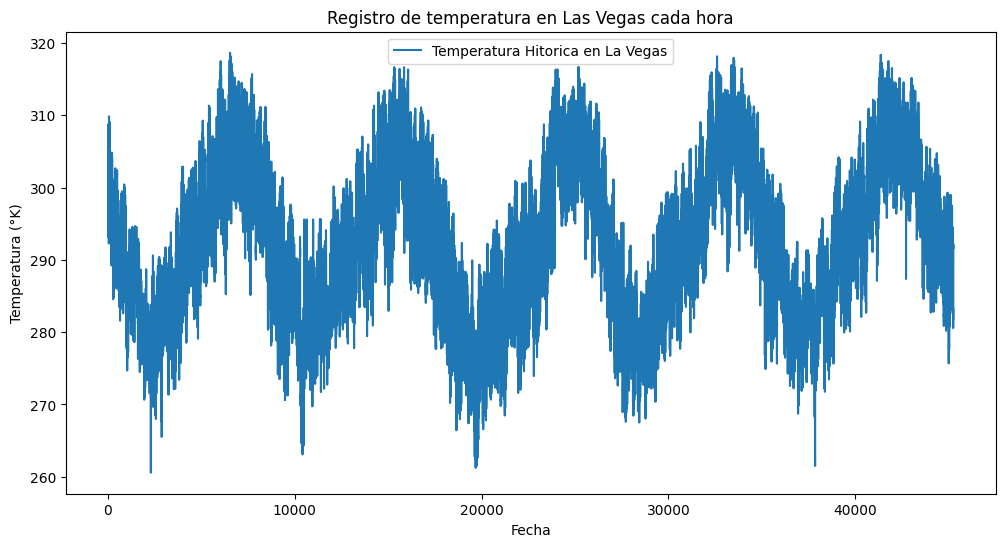

In [12]:
plt.figure(figsize=(12,6))
plt.plot(datos['Las Vegas'], label='Temperatura Hitorica en La Vegas')
plt.title("Registro de temperatura en Las Vegas cada hora")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°K)")
plt.legend()
plt.show()

In [13]:
valores_faltantes = datos.isnull().sum()

In [14]:
valores_faltantes

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [15]:
datos = datos.fillna(datos.median())

C:\Users\odstr\AppData\Local\Temp\ipykernel_22324\1796188233.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  datos = datos.fillna(datos.median())


In [16]:
datos.isnull().sum()

datetime             0
Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [17]:
dallas_datos= datos[['datetime', 'Dallas']].copy()

In [18]:
dallas_datos.head()

,datetime,Dallas
0,2012-10-01 12:00:00,293.563000
1,2012-10-01 13:00:00,289.740000
2,2012-10-01 14:00:00,289.762974
3,2012-10-01 15:00:00,289.830767
4,2012-10-01 16:00:00,289.898560


In [19]:
dallas_datos.shape

(45253, 2)

In [20]:
dallas_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  45253 non-null  datetime64[ns]
 1   Dallas    45253 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 707.2 KB


In [21]:
dallas_datos.describe()

,Dallas
count,45253.000000
mean,292.375977
std,9.464330
min,261.610333
25%,285.720000
50%,293.563000
75%,299.550000
max,314.400000


In [22]:
dallas_datos['datetime'] = pd.to_datetime(dallas_datos['datetime'])
dallas_datos['datetime'] = pd.to_numeric(dallas_datos['datetime'])

In [23]:
dallas_datos.head()

,datetime,Dallas
0,1349092800000000000,293.563000
1,1349096400000000000,289.740000
2,1349100000000000000,289.762974
3,1349103600000000000,289.830767
4,1349107200000000000,289.898560


In [27]:
X = dallas_datos[['datetime']]
y = dallas_datos['Dallas']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [29]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = modelo.predict(X_test)

In [31]:
len(y_pred)

9051

In [32]:
len(y_test)

9051

In [33]:
y_test

21603    288.640000
34366    295.440000
27864    279.417361
30577    279.750000
25531    297.900000
            ...    
37450    281.550000
36758    281.590000
38470    289.472000
542      296.620000
3852     292.580000
Name: Dallas, Length: 9051, dtype: float64

In [35]:
mse = mean_squared_error(y_test, y_pred)

In [36]:
mse

88.13855788387586

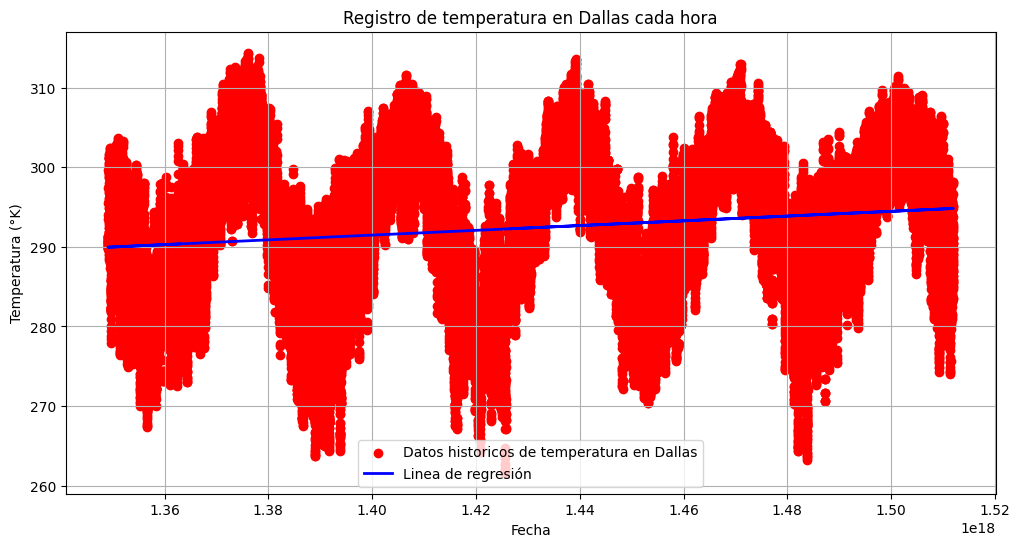

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(dallas_datos['datetime'], dallas_datos['Dallas'],color='red', label='Datos historicos de temperatura en Dallas')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label="Linea de regresión")
plt.title("Registro de temperatura en Dallas cada hora")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°K)")
plt.legend()
plt.grid(True)
plt.show()